## Debt Collection Dataset EDA and Feature Engineering
## Cleaning and preparing data for model training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem Statement
In the realm of debt collection, the ability to discern which accounts are statute-barred—thus potentially unrecoverable—holds immense significance. This project endeavors to develop a sophisticated machine-learning model aimed at accurately predicting the probability of successfully collecting debts by meticulously examining the statute-barred status of each account.
Given a dataset encompassing a multitude of attributes including original creditor information, account IDs, current balances, purchase dates, and a wealth of other pertinent features, the objective is to construct a predictive model that excels in identifying accounts where the statute barred status may influence the likelihood of debt retrieval.
The focal point of this endeavor centers on the IsStatBarred field ‘Y’ status, which serves as the pivotal target variable for classification. 


In [2]:
df1 = pd.read_excel("Company_x.xlsx")

In [3]:
df1.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,53.0,0,0,1,N,NaN,NaN,NaN
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,NaN,1.0,NaN,0,0,1,Y,NaN,NaN,NaN
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,NaN,1,0,1,N,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,NaN,1.0,NaN,1,0,1,Y,NaN,NaN,NaN
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,46.0,2,0,1,Y,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   Balanaceatdebt_load         406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   ClosureReason               9030 non-null    object 
 10  InBankruptcy                406423 non-null  object 
 11  AccountInsolvencyType       285 non-null     object 
 12  CustomerInsolvencyType      8531 non-null    object 
 13  IsLegal       

In [5]:
df1.describe()

,EntityID,AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,LastPaymentAmount,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,4.064230e+05,4.064230e+05,406423.000000,406423.000000,406423.000000,403731.000000,103977.000000,406301.000000,376941.000000,406423.000000,406423.000000,406423.000000,0.0,0.0,1.0
mean,3.970443e+07,3.954380e+08,1301.866266,1539.010928,1600.933847,5.618606,283.896947,1.017145,45.728061,0.435652,0.208113,0.847354,NaN,NaN,960.0
std,4.698070e+07,4.654769e+08,4030.513710,4416.229311,4531.889319,5.441934,1119.842219,0.132866,12.950395,0.714852,0.434321,0.459690,NaN,NaN,NaN
min,1.600000e+02,3.677000e+03,-7717.200000,0.000000,0.000000,0.190000,0.010000,1.000000,-41.000000,0.000000,0.000000,0.000000,NaN,NaN,960.0
25%,3.010600e+06,3.023088e+07,85.330000,246.970000,249.875000,3.070000,20.000000,1.000000,36.000000,0.000000,0.000000,1.000000,NaN,NaN,960.0
50%,3.010949e+06,3.045075e+07,457.510000,619.000000,630.740000,4.220000,40.000000,1.000000,44.000000,0.000000,0.000000,1.000000,NaN,NaN,960.0
75%,9.990131e+07,9.901891e+08,1159.365000,1393.780000,1433.755000,6.590000,142.900000,1.000000,54.000000,1.000000,0.000000,1.000000,NaN,NaN,960.0
max,9.990159e+07,9.904958e+08,441681.520000,844343.000000,844343.000000,52.180000,73131.840000,4.000000,133.000000,8.000000,5.000000,7.000000,NaN,NaN,960.0


In [6]:
df1 = df1.drop(['EntityID', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'], axis = 1)

In [7]:
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,InBankruptcy,...,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,N,...,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,N,...,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,N,...,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,NaN,N,...,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,N,...,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  object 
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  object 
 7   CollectionStatus            406423 non-null  object 
 8   ClosureReason               9030 non-null    object 
 9   InBankruptcy                406423 non-null  object 
 10  AccountInsolvencyType       285 non-null     object 
 11  CustomerInsolvencyType      8531 non-null    object 
 12  IsLegal                     406423 non-null  object 
 13  LastPaymentAmo

## Handling Categorical Data

1. Handling Categorical Feature OriginalCreditor[Redacted]

In [9]:
#Frequency Encoding - Encoding the categorical values depending upon their frequencies(by taking their normalized value instead of raw counts)
df1['OriginalCreditor[Redacted]'].value_counts(normalize=True).head()

OriginalCreditor[Redacted]
Creditor 17    0.208571
Creditor 33    0.136129
Creditor 47    0.135069
Creditor 48    0.061173
Creditor 7     0.054382
Name: proportion, dtype: float64

In [10]:
#storing the categorical features normalize value_counts in a dictionary
frequency_dict_1 = df1['OriginalCreditor[Redacted]'].value_counts(normalize=True).to_dict()
print(frequency_dict_1)

{'Creditor 17': 0.20857087320353423, 'Creditor 33': 0.13612910686649132, 'Creditor 47': 0.13506863538726893, 'Creditor 48': 0.061172719063635674, 'Creditor 7': 0.05438176481153872, 'Creditor 19': 0.05032687618564894, 'Creditor 10': 0.046594311837666665, 'Creditor 44': 0.04242378015023756, 'Creditor 25': 0.04099915605169983, 'Creditor 42': 0.039205458352504656, 'Creditor 35': 0.03562790491679851, 'Creditor 50': 0.03257689648469698, 'Creditor 43': 0.01830851108328023, 'Creditor 8': 0.016111292914032918, 'Creditor 49': 0.013980507992903944, 'Creditor 36': 0.009317878171264914, 'Creditor 41': 0.006798335724110102, 'Creditor 52': 0.005823981418374452, 'Creditor 40': 0.005612379220664185, 'Creditor 9': 0.004938204776796589, 'Creditor 30': 0.0035923163797324464, 'Creditor 6': 0.0032798340645091443, 'Creditor 34': 0.003265071120482847, 'Creditor 45': 0.003107599717535671, 'Creditor 31': 0.0028763135944570068, 'Creditor 39': 0.0022808748520629983, 'Creditor 51': 0.0021504688464973683, 'Creditor

In [11]:
#updating the categorical values with their correspondence normalized value_counts
df1['OriginalCreditor[Redacted]'] = df1['OriginalCreditor[Redacted]'].map(frequency_dict_1)
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,InBankruptcy,...,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,N,...,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,N,...,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,N,...,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,NaN,N,...,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,N,...,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  object 
 7   CollectionStatus            406423 non-null  object 
 8   ClosureReason               9030 non-null    object 
 9   InBankruptcy                406423 non-null  object 
 10  AccountInsolvencyType       285 non-null     object 
 11  CustomerInsolvencyType      8531 non-null    object 
 12  IsLegal                     406423 non-null  object 
 13  LastPaymentAmo

2. Handling Categorical Data ProductOrDebtType

In [13]:
#Here also, we will go with the frequency encoding technique as it is clearly evident that the frequency differenc of each category is considerable
df1["ProductOrDebtType"].value_counts()

ProductOrDebtType
Utilities/Telco - Other    212158
Other                       84218
Finance Company - Other     48695
Store Cards                 17699
Credit Cards                16891
Bank - Other                13030
Residential Electricity      7693
Personal Loans               4309
Loans                        1260
Hire Purchase                 470
Name: count, dtype: int64

In [14]:
df1["ProductOrDebtType"].value_counts(normalize=True)

ProductOrDebtType
Utilities/Telco - Other    0.522013
Other                      0.207218
Finance Company - Other    0.119814
Store Cards                0.043548
Credit Cards               0.041560
Bank - Other               0.032060
Residential Electricity    0.018929
Personal Loans             0.010602
Loans                      0.003100
Hire Purchase              0.001156
Name: proportion, dtype: float64

In [15]:
frequency_dict_2 = df1["ProductOrDebtType"].value_counts(normalize=True).to_dict()
print(frequency_dict_2)

{'Utilities/Telco - Other': 0.5220127797885454, 'Other': 0.20721760333445696, 'Finance Company - Other': 0.11981359322676129, 'Store Cards': 0.04354822438690724, 'Credit Cards': 0.04156014792469914, 'Bank - Other': 0.03206019344377656, 'Residential Electricity': 0.018928554732384733, 'Personal Loans': 0.010602254301552816, 'Loans': 0.003100218245522522, 'Hire Purchase': 0.0011564306153933218}


In [16]:
df1["ProductOrDebtType"] = df1["ProductOrDebtType"].map(frequency_dict_2)
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,InBankruptcy,...,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,PAID_IN_FULL,NaN,N,...,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,CANCELLED_WITHDRAWN,NaN,N,...,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,PAID_IN_FULL,NaN,N,...,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,PASSIVE,NaN,N,...,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,PAID_IN_FULL,NaN,N,...,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  object 
 8   ClosureReason               9030 non-null    object 
 9   InBankruptcy                406423 non-null  object 
 10  AccountInsolvencyType       285 non-null     object 
 11  CustomerInsolvencyType      8531 non-null    object 
 12  IsLegal                     406423 non-null  object 
 13  LastPaymentAmo

3. Handling Categorical Data CollectionStatus

In [18]:
#Here also frequency encoding seems best as some categories occur way more time than the other
#however, we can also opt for one-hot encoding as it preserves the distinction between different categories without assuming any ordinal relationship between them
df1['CollectionStatus'].value_counts()

CollectionStatus
ACTIVE                 169489
PASSIVE                138040
PAID_IN_FULL            69172
CLOSED                  13562
CANCELLED_WITHDRAWN      5489
UNDER_ARRANGEMENT        4237
SETTLED FOR LESS         4191
LEGAL                    1559
LEGAL_ARRANGEMENT         361
NON_COLLECTION            237
HOLDING                    59
PENDING                    27
Name: count, dtype: int64

In [19]:
frequency_dict_3 = df1['CollectionStatus'].value_counts(normalize=True).to_dict()
print(frequency_dict_3)

{'ACTIVE': 0.41702610334552914, 'PASSIVE': 0.33964613223168966, 'PAID_IN_FULL': 0.17019706069784438, 'CLOSED': 0.033369174480774956, 'CANCELLED_WITHDRAWN': 0.013505633293391368, 'UNDER_ARRANGEMENT': 0.010425098973237243, 'SETTLED FOR LESS': 0.01031191640236896, 'LEGAL': 0.0038359049561663586, 'LEGAL_ARRANGEMENT': 0.000888237132248913, 'NON_COLLECTION': 0.0005831362890387601, 'HOLDING': 0.00014516894959192762, 'PENDING': 6.643324811833976e-05}


In [20]:
#assigining these normalized value to the features
df1['CollectionStatus'] = df1['CollectionStatus'].map(frequency_dict_3)
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,InBankruptcy,...,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,NaN,N,...,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,NaN,N,...,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,NaN,N,...,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,NaN,N,...,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,NaN,N,...,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   ClosureReason               9030 non-null    object 
 9   InBankruptcy                406423 non-null  object 
 10  AccountInsolvencyType       285 non-null     object 
 11  CustomerInsolvencyType      8531 non-null    object 
 12  IsLegal                     406423 non-null  object 
 13  LastPaymentAmo

3. Handling categorical data ClosureReason

In [22]:
#Here it is clearly evident that, almost 98% of the data is missing in this feature, 
#hence, dropping this feature is an optimal solution in this position
df1['ClosureReason'].value_counts(dropna=False, normalize=True)

ClosureReason
NaN                                0.977782
Insolvent                          0.013862
Statute Barred                     0.004372
Other Reason - Please see notes    0.001599
Deceased                           0.000996
Small Balance                      0.000408
Duplicate Debt                     0.000263
Uneconomical to pursue             0.000258
Fraud                              0.000236
Company Struck Off                 0.000091
Client Instructions                0.000079
Sensitive Issue                    0.000034
Paid                               0.000010
Incarcerated                       0.000005
Disputes/Legal Case Lost           0.000002
Name: proportion, dtype: float64

In [23]:
#dropping the feature after creating another deep copy of the df1 dataframe
df1.drop(["ClosureReason"], inplace=True, axis=1)
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,N,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,N,NaN,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,N,NaN,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,N,NaN,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,N,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   InBankruptcy                406423 non-null  object 
 9   AccountInsolvencyType       285 non-null     object 
 10  CustomerInsolvencyType      8531 non-null    object 
 11  IsLegal                     406423 non-null  object 
 12  LastPaymentAmount           103977 non-null  float64
 13  LastPaymentMet

4. Handling Categorical Data InBankruptcy

In [25]:
df1['InBankruptcy'].value_counts()

InBankruptcy
N    398270
Y      8153
Name: count, dtype: int64

In [26]:
#as this contains binary categories, we can opt for label encoder
#it will encode N as 0 and Y as 1
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['InBankruptcy'] = label_encoder.fit_transform(df1["InBankruptcy"])
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,0,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,0,NaN,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,0,NaN,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,0,NaN,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,0,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   InBankruptcy                406423 non-null  int32  
 9   AccountInsolvencyType       285 non-null     object 
 10  CustomerInsolvencyType      8531 non-null    object 
 11  IsLegal                     406423 non-null  object 
 12  LastPaymentAmount           103977 non-null  float64
 13  LastPaymentMet

4. Handling Categorical Data AccountInsolvencyType

In [28]:
#in this feature, almost 99.92% data is missing
#so we will be dropping this feature from our dataset
df1['AccountInsolvencyType'].value_counts(dropna=False, normalize=True)

AccountInsolvencyType
NaN                                                       0.999299
LIQUIDATION_NOP                                           0.000396
BANKRUPTCY_NOTICE                                         0.000251
BANKRUPTCY_CREDITOR_UNION_PETITION                        0.000044
BANKRUPTCY_CREDITOR_UNION_PETITION | BANKRUPTCY_NOTICE    0.000005
BANKRUPTCY_NOTICE | LIQUIDATION_NOP                       0.000005
Name: proportion, dtype: float64

In [29]:
df1.drop(['AccountInsolvencyType'], axis=1, inplace=True)

In [30]:
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,0,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,0,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,0,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,0,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,0,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   InBankruptcy                406423 non-null  int32  
 9   CustomerInsolvencyType      8531 non-null    object 
 10  IsLegal                     406423 non-null  object 
 11  LastPaymentAmount           103977 non-null  float64
 12  LastPaymentMethod           103977 non-null  object 
 13  NumLiableParti

5. Handling Categorical Data CustomerInsolvencyType

In [32]:
df1['CustomerInsolvencyType'].value_counts(dropna=False)

CustomerInsolvencyType
NaN                                           397892
BANKRUPT                                        3809
NO_ASSET_PROCEDURE                              3154
STRUCK_OFF                                      1009
LIQUIDATION                                      410
BANKRUPT | NO_ASSET_PROCEDURE                     59
APPLICATION_FOR_LIQUIDATION                       28
LIQUIDATION | STRUCK_OFF                          17
RECEIVERSHIP                                      15
BANKRUPT | LIQUIDATION                            13
LIQUIDATION | RECEIVERSHIP                         9
BANKRUPT | STRUCK_OFF                              5
APPLICATION_FOR_LIQUIDATION | STRUCK_OFF           2
APPLICATION_FOR_LIQUIDATION | RECEIVERSHIP         1
Name: count, dtype: int64

In [33]:
#this feature also has almost 98% NaN values
#hence we will be dropping this feature
df1['CustomerInsolvencyType'].value_counts(dropna=False, normalize=True)

CustomerInsolvencyType
NaN                                           0.979010
BANKRUPT                                      0.009372
NO_ASSET_PROCEDURE                            0.007760
STRUCK_OFF                                    0.002483
LIQUIDATION                                   0.001009
BANKRUPT | NO_ASSET_PROCEDURE                 0.000145
APPLICATION_FOR_LIQUIDATION                   0.000069
LIQUIDATION | STRUCK_OFF                      0.000042
RECEIVERSHIP                                  0.000037
BANKRUPT | LIQUIDATION                        0.000032
LIQUIDATION | RECEIVERSHIP                    0.000022
BANKRUPT | STRUCK_OFF                         0.000012
APPLICATION_FOR_LIQUIDATION | STRUCK_OFF      0.000005
APPLICATION_FOR_LIQUIDATION | RECEIVERSHIP    0.000002
Name: proportion, dtype: float64

In [34]:
df1.drop(['CustomerInsolvencyType'], axis=1, inplace=True)
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,0,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,0,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,0,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,0,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,0,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   InBankruptcy                406423 non-null  int32  
 9   IsLegal                     406423 non-null  object 
 10  LastPaymentAmount           103977 non-null  float64
 11  LastPaymentMethod           103977 non-null  object 
 12  NumLiableParties            406301 non-null  float64
 13  CustomerAge   

6. Handling categorical Data IsLegal

In [36]:
#it is a binary categorical data, hence we will be encoding with Label encoder
df1['IsLegal'].value_counts()

IsLegal
N    396709
Y      9714
Name: count, dtype: int64

In [37]:
df1['IsLegal'] = label_encoder.fit_transform(df1["IsLegal"])
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,0,1,10.00,Cheque,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,0,0,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,0,0,5.37,Cheque,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,0,0,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,0,1,5.00,Cheque,1.0,46.0,2,0,1,Y


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   InBankruptcy                406423 non-null  int32  
 9   IsLegal                     406423 non-null  int32  
 10  LastPaymentAmount           103977 non-null  float64
 11  LastPaymentMethod           103977 non-null  object 
 12  NumLiableParties            406301 non-null  float64
 13  CustomerAge   

7. Handling Categorical Dala LastPaymnetMethod

In [39]:
#encoding this categorical data with frequency encoding
df1['LastPaymentMethod'].value_counts()

LastPaymentMethod
Cheque                      54154
Automatic Payment           27339
Direct Credit                8798
Direct Debit                 5465
Unknown                      3702
Cash                         3359
Credit Card / Debit Card     1122
Direct Transfer                31
Mastercard                      7
Name: count, dtype: int64

In [40]:
df1['LastPaymentMethod'].value_counts(normalize=True)

LastPaymentMethod
Cheque                      0.520827
Automatic Payment           0.262933
Direct Credit               0.084615
Direct Debit                0.052560
Unknown                     0.035604
Cash                        0.032305
Credit Card / Debit Card    0.010791
Direct Transfer             0.000298
Mastercard                  0.000067
Name: proportion, dtype: float64

In [41]:
frequency_dict_4 = df1['LastPaymentMethod'].value_counts(normalize=True).to_dict()
df1["LastPaymentMethod"] = df1["LastPaymentMethod"].map(frequency_dict_4)
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,0,1,10.00,0.520827,1.0,53.0,0,0,1,N
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,0,0,NaN,NaN,1.0,NaN,0,0,1,Y
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,0,0,5.37,0.520827,1.0,NaN,1,0,1,N
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,0,0,NaN,NaN,1.0,NaN,1,0,1,Y
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,0,1,5.00,0.520827,1.0,46.0,2,0,1,Y


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               403731 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   InBankruptcy                406423 non-null  int32  
 9   IsLegal                     406423 non-null  int32  
 10  LastPaymentAmount           103977 non-null  float64
 11  LastPaymentMethod           103977 non-null  float64
 12  NumLiableParties            406301 non-null  float64
 13  CustomerAge   

In [180]:
#Finally encoding the target variale using LabelEncoder
df1["IsStatBarred"] = label_encoder.fit_transform(df1["IsStatBarred"])
df1.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,0,1,10.00,0.520827,1.0,53.0,0,0,1,0
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,0,0,20.00,0.262933,1.0,44.0,0,0,1,1
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,0,0,5.37,0.520827,1.0,44.0,1,0,1,0
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,0,0,20.00,0.520827,1.0,44.0,1,0,1,1
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,0,1,5.00,0.520827,1.0,46.0,2,0,1,1


## Summary of the categorical data handling

In [177]:
# 1. Frequency encoding of OriginalCreditor[Redacted]
#frequency_dict_1

# 2. Frequency encoding of ProductOrDebtType
#frequency_dict_2

# 3. Frequency encoding of CollectionStatus
#frequency_dict_3

# 4. Dropped feature CustomerInsolvencyType & AccountInsolvencyType

# 5. LabelEncoded IsLegal
is_legal_encoding_data = {"Y": 1, "N": 0}

# 6. Frequency encoding of LastPaymentMethod
#frequency_dict_4

#7. LabelEncdoed IsStatBarred
is_Stat_Barred_encoding_data = {"Y": 1, "N": 0}

In [179]:
encoding_data = {"Description": """
# 1. Frequency encoding of OriginalCreditor[Redacted]
#frequency_dict_1

# 2. Frequency encoding of ProductOrDebtType
#frequency_dict_2

# 3. Frequency encoding of CollectionStatus
#frequency_dict_3

# 4. Dropped feature CustomerInsolvencyType & AccountInsolvencyType

# 5. LabelEncoded IsLegal

# 6. Frequency encoding of LastPaymentMethod
#frequency_dict_4

#7. LabelEncdoed IsStatBarred
""",
                "OriginalCreditor[Redacted]": frequency_dict_1, 
                 "ProductOrDebtType": frequency_dict_2,
                 "CollectionStatus": frequency_dict_3,
                 "IsLegal": is_legal_encoding_data,
                 "LastPaymentMethod": frequency_dict_4,
                 "IsStatBarred": is_Stat_Barred_encoding_data
                }
#saving the above encoding data into a json file for future reference
import json

with open("encoding_data.json", "w") as json_file:
    json.dump(encoding_data, json_file)

## Handling Missing Values

In [43]:
df1.isnull().sum()

OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                   2692
ProductOrDebtType                  0
CollectionStatus                   0
InBankruptcy                       0
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
dtype: int64

In [44]:
#this feature has continious data
df1['PurchasePrice'].value_counts()

PurchasePrice
3.07     84764
2.32     39909
3.60     38075
7.38     34214
4.22     32402
5.72     24862
4.96     18870
6.59     17250
11.70    16655
4.31     16575
9.68     14477
5.34      8523
3.87      8449
9.41      8048
3.96      6536
8.15      4493
52.18     3783
15.31     3521
4.23      3373
1.84      2762
5.11      2281
10.95     1733
14.83     1542
6.31      1449
1.44      1327
25.41     1158
7.74       921
10.30      874
0.19       855
6.93       785
10.75      633
6.08       542
5.00       474
16.70      434
1.77       355
0.65       310
32.27      246
11.07      152
2.35       106
12.00        3
11.67        2
11.71        2
11.73        1
11.10        1
4.00         1
15.00        1
4.97         1
7.00         1
Name: count, dtype: int64

In [45]:
df1['PurchasePrice'].median()

4.22

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PurchasePrice', ylabel='Count'>

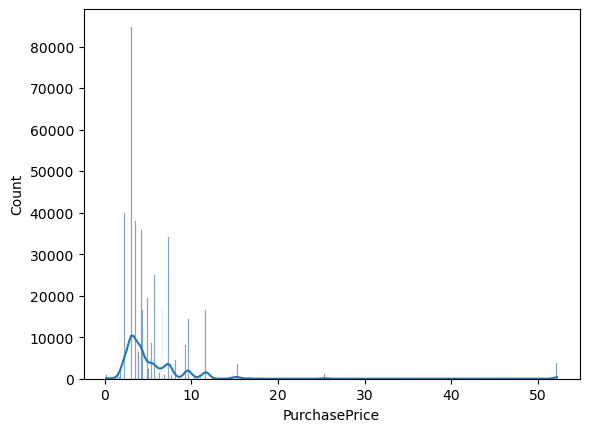

In [46]:
sns.histplot(df1['PurchasePrice'], kde=True)

In [48]:
#this is also a continious data
df1['LastPaymentAmount'].unique()

array([1.00000e+01,         nan, 5.37000e+00, ..., 6.39470e+02,
       5.84308e+03, 1.61208e+03])

In [49]:
df1['LastPaymentAmount'].value_counts()

LastPaymentAmount
20.00      9835
10.00      7569
50.00      4585
30.00      3644
25.00      3156
           ... 
992.60        1
477.80        1
232.50        1
73.54         1
1612.08       1
Name: count, Length: 25874, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LastPaymentAmount', ylabel='Count'>

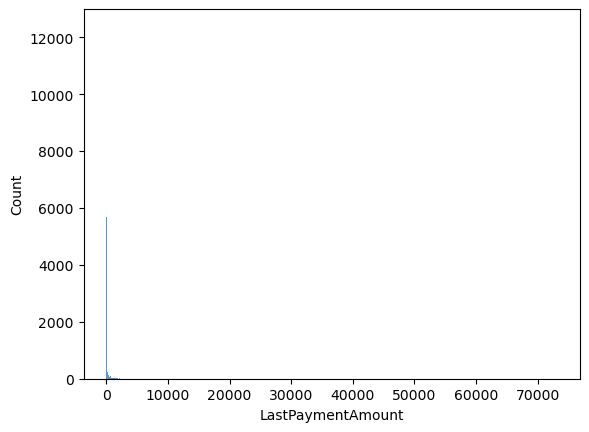

In [51]:
sns.histplot(df1["LastPaymentAmount"])

In [52]:
#this is a discrete data
df1['CustomerAge'].value_counts()

CustomerAge
 38.0    14260
 37.0    13788
 39.0    13335
 36.0    12765
 40.0    12662
         ...  
 5.0         1
-6.0         1
-22.0        1
-4.0         1
-30.0        1
Name: count, Length: 126, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CustomerAge', ylabel='Count'>

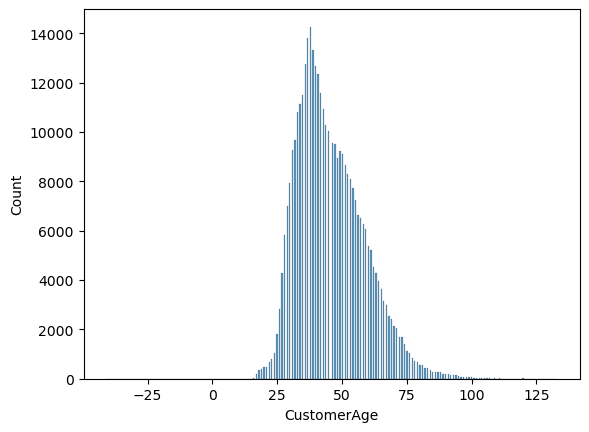

In [54]:
sns.histplot(df1["CustomerAge"])

In [55]:
#this is a discrete data
df1['NumLiableParties'].value_counts()

NumLiableParties
1.0    399494
2.0      6652
3.0       151
4.0         4
Name: count, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='NumLiableParties', ylabel='Count'>

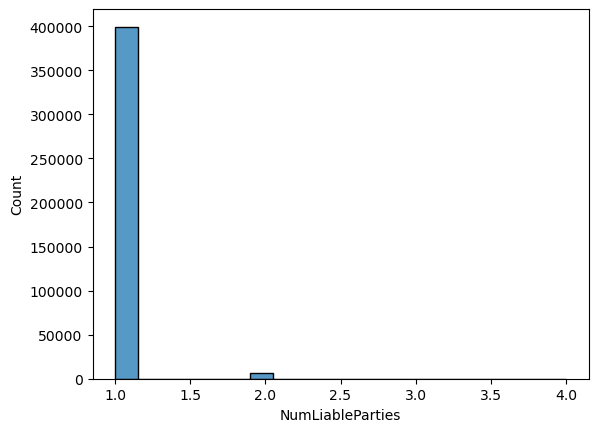

In [56]:
sns.histplot(df1['NumLiableParties'])

In [58]:
#this is a continious data
df1['LastPaymentMethod'].value_counts()

LastPaymentMethod
0.520827    54154
0.262933    27339
0.084615     8798
0.052560     5465
0.035604     3702
0.032305     3359
0.010791     1122
0.000298       31
0.000067        7
Name: count, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LastPaymentMethod', ylabel='Count'>

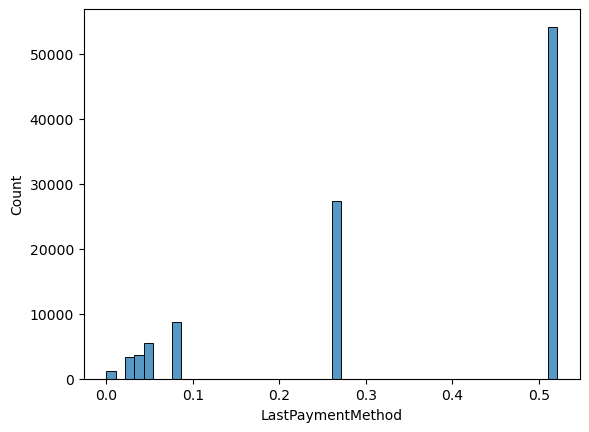

In [59]:
sns.histplot(df1['LastPaymentMethod'])

Handling NaN of discrete data

In [61]:
#Filling missiing values in Purchase Price
#from above hist, we conclude that we have to fill its missing value with the median of the data

df1["PurchasePrice"] = df1["PurchasePrice"].fillna(df1["PurchasePrice"].median())

In [62]:
df1.isnull().sum()

OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                      0
ProductOrDebtType                  0
CollectionStatus                   0
InBankruptcy                       0
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
dtype: int64

In [63]:
#Filling missing values in NumLiableParties
#from above data distribution, we will fill it my imputing its most repeated value using mode
df1['NumLiableParties'] = df1['NumLiableParties'].fillna(df1['NumLiableParties'].mode()[0])

In [64]:
df1.isnull().sum()

OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                      0
ProductOrDebtType                  0
CollectionStatus                   0
InBankruptcy                       0
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                   0
CustomerAge                    29482
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
dtype: int64

In [65]:
#Filling Missing values is CustomerAge
#looking at above distribution, it look like it is normally distributed with a slightly right skewed data
#hence, we will replace the missing values with its median
df1['CustomerAge'] = df1['CustomerAge'].fillna(df1['CustomerAge'].median())

In [66]:
df1.isnull().sum()

OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                      0
ProductOrDebtType                  0
CollectionStatus                   0
InBankruptcy                       0
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                   0
CustomerAge                        0
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
dtype: int64

In [67]:
#Filling missing values in LastPaymentAmount
#distribution of this data also suggest that mode of this feature should be taken to repalce the NaN values

df1["LastPaymentAmount"] = df1["LastPaymentAmount"].fillna(df1["LastPaymentAmount"].mode()[0])

In [68]:
df1.isnull().sum()

OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                      0
ProductOrDebtType                  0
CollectionStatus                   0
InBankruptcy                       0
IsLegal                            0
LastPaymentAmount                  0
LastPaymentMethod             302446
NumLiableParties                   0
CustomerAge                        0
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
dtype: int64

In [186]:
df1["LastPaymentMethod"].value_counts(normalize=True)

LastPaymentMethod
0.520827    0.627760
0.262933    0.316919
0.084615    0.021647
0.052560    0.013447
0.035604    0.009109
0.032305    0.008265
0.010791    0.002761
0.000298    0.000076
0.000067    0.000017
Name: proportion, dtype: float64

In [136]:
#filling missing values in LastPaymentMethod
#since the first two counts are almost 81% of the non-missing values, hence will be filling the NaN values of the dataframe proportionally with these values
highest_count = df1["LastPaymentMethod"].value_counts().values[0]
sec_high_count = df1["LastPaymentMethod"].value_counts().values[1]
total_count = highest_count + sec_high_count
prop_1 = highest_count/total_count
prop_1

0.6645233332924301

In [158]:
#collecting the index of null values in an array
arr = np.array(df1[df1["LastPaymentMethod"].isnull()].index)
num_elements = len(arr)
arr, num_elements

(array([], dtype=int64), 0)

In [161]:
#slicing the array into two parts as per the proportion randomly
num_elements_first_part = int(prop_1 * num_elements)
num_elements_second_part = num_elements - num_elements_first_part
np.random.shuffle(arr) #shuffles the array randonmly before slicing them 
first_part_index = arr[:num_elements_first_part]
second_part_index = arr[num_elements_first_part:]
#setting the value for replacement of slices as per the proportion
replace_value_first_part = df1["LastPaymentMethod"].value_counts(normalize=True).values[0]
replace_value_second_part = df1["LastPaymentMethod"].value_counts(normalize=True).values[1]
first_part_index, second_part_index, replace_value_first_part, replace_value_second_part

(array([], dtype=int64),
 array([], dtype=int64),
 0.6277597478489161,
 0.3169185799032043)

In [160]:
# Create a boolean mask to identify NaN values at the specified indices
nan_mask_1 = df1["LastPaymentMethod"].index.isin(first_part_index) & df1["LastPaymentMethod"].isna()
nan_mask_2 = df1["LastPaymentMethod"].index.isin(second_part_index) & df1["LastPaymentMethod"].isna()
nan_mask_1, nan_mask_2

(0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 406418    False
 406419    False
 406420    False
 406421    False
 406422    False
 Name: LastPaymentMethod, Length: 406423, dtype: bool,
 0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 406418    False
 406419    False
 406420    False
 406421    False
 406422    False
 Name: LastPaymentMethod, Length: 406423, dtype: bool)

In [162]:
#Finally replacing the NaN vaules with the nan_mask
df1["LastPaymentMethod"].loc[nan_mask_1] = replace_value_first_part
df1["LastPaymentMethod"].loc[nan_mask_2] = replace_value_second_part

C:\Users\DELL\AppData\Local\Temp\ipykernel_18824\101723190.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["LastPaymentMethod"].loc[nan_mask_1] = replace_value_first_part
C:\Users\DELL\AppData\Local\Temp\ipykernel_18824\101723190.py:

In [163]:
df1.isnull().sum()

OriginalCreditor[Redacted]    0
AccountID                     0
CurrentBalance                0
DebtLoadPrincipal             0
Balanaceatdebt_load           0
PurchasePrice                 0
ProductOrDebtType             0
CollectionStatus              0
InBankruptcy                  0
IsLegal                       0
LastPaymentAmount             0
LastPaymentMethod             0
NumLiableParties              0
CustomerAge                   0
NumPhones                     0
NumEmails                     0
NumAddresses                  0
IsStatBarred                  0
dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LastPaymentMethod', ylabel='Count'>

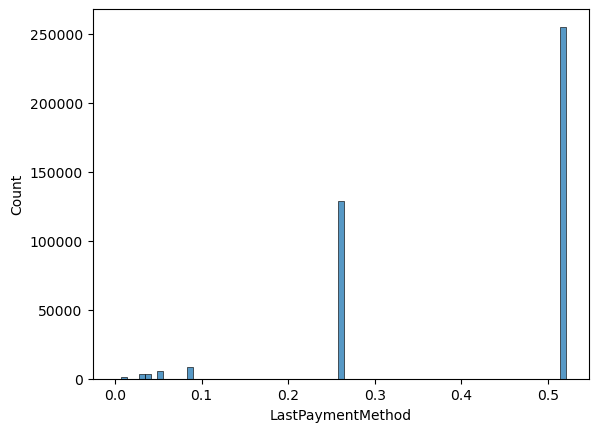

In [164]:
sns.histplot(df1["LastPaymentMethod"])

In [167]:
df1.describe()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
count,406423.000000,4.064230e+05,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000,406423.000000
mean,0.100127,3.954380e+08,1301.866266,1539.010928,1600.933847,5.609342,0.334925,0.319764,0.020060,0.023901,87.513927,0.413442,1.017140,45.602707,0.435652,0.208113,0.847354
std,0.070378,4.654769e+08,4030.513710,4416.229311,4531.889319,5.425067,0.202202,0.120124,0.140207,0.152742,578.000546,0.146542,0.132846,12.479892,0.714852,0.434321,0.459690
min,0.000002,3.677000e+03,-7717.200000,0.000000,0.000000,0.190000,0.001156,0.000066,0.000000,0.000000,0.010000,0.000067,1.000000,-41.000000,0.000000,0.000000,0.000000
25%,0.040999,3.023088e+07,85.330000,246.970000,249.875000,3.070000,0.119814,0.339646,0.000000,0.000000,20.000000,0.262933,1.000000,37.000000,0.000000,0.000000,1.000000
50%,0.061173,3.045075e+07,457.510000,619.000000,630.740000,4.220000,0.522013,0.339646,0.000000,0.000000,20.000000,0.520827,1.000000,44.000000,0.000000,0.000000,1.000000
75%,0.136129,9.901891e+08,1159.365000,1393.780000,1433.755000,6.590000,0.522013,0.417026,0.000000,0.000000,20.000000,0.520827,1.000000,53.000000,1.000000,0.000000,1.000000
max,0.208571,9.904958e+08,441681.520000,844343.000000,844343.000000,52.180000,0.522013,0.417026,1.000000,1.000000,73131.840000,0.520827,4.000000,133.000000,8.000000,5.000000,7.000000


In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               406423 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   InBankruptcy                406423 non-null  int32  
 9   IsLegal                     406423 non-null  int32  
 10  LastPaymentAmount           406423 non-null  float64
 11  LastPaymentMethod           406423 non-null  float64
 12  NumLiableParties            406423 non-null  float64
 13  CustomerAge   

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.0,1160.20,1160.20,4.22,0.207218,0.170197,0,1,10.00,0.520827,1.0,53.0,0,0,1,0
1,0.000015,4276,182.9,182.90,182.90,4.22,0.207218,0.013506,0,0,20.00,0.262933,1.0,44.0,0,0,1,1
2,0.000020,8525,0.0,538.57,538.57,4.22,0.207218,0.170197,0,0,5.37,0.520827,1.0,44.0,1,0,1,0
3,0.000015,9859,8279.5,8279.50,8279.50,4.22,0.207218,0.339646,0,0,20.00,0.520827,1.0,44.0,1,0,1,1
4,0.000020,12807,0.0,523.00,523.00,4.22,0.207218,0.170197,0,1,5.00,0.520827,1.0,46.0,2,0,1,1


In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  float64
 1   AccountID                   406423 non-null  int64  
 2   CurrentBalance              406423 non-null  float64
 3   DebtLoadPrincipal           406423 non-null  float64
 4   Balanaceatdebt_load         406423 non-null  float64
 5   PurchasePrice               406423 non-null  float64
 6   ProductOrDebtType           406423 non-null  float64
 7   CollectionStatus            406423 non-null  float64
 8   InBankruptcy                406423 non-null  int32  
 9   IsLegal                     406423 non-null  int32  
 10  LastPaymentAmount           406423 non-null  float64
 11  LastPaymentMethod           406423 non-null  float64
 12  NumLiableParties            406423 non-null  float64
 13  CustomerAge   

## Summary of Handling Missing Values

1. PurchasePrice distribution is a right skewed data, hence replaced its NaN values with the median.
2. NumLiableParties has high frequency distribution, hence replaced the NaN values with its mode.
3. CustomerAge distribution is almost normal with slight right skewed, hence replaced the NaN with its median.
4. LastPayment amount has high frequency distribution, hence replaced with NaN values with its mode.
5. LastPaymentMethod: in this since the first two counts are almost 81% of the non-missing values, hence filled the NaN values of the dataframe proportionally with these values


## Handling Outliers

OriginalCreditor[Redacted]


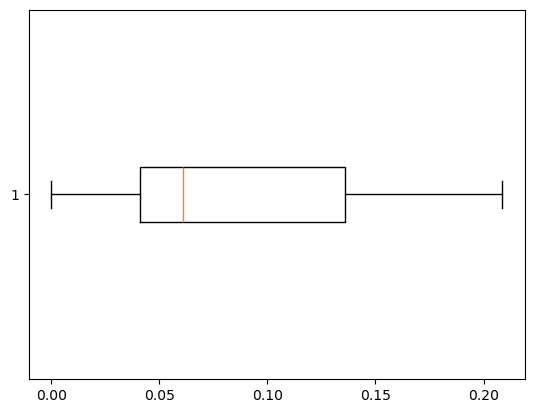

AccountID


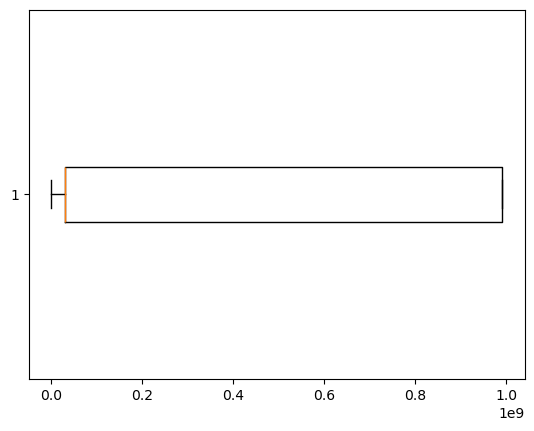

CurrentBalance


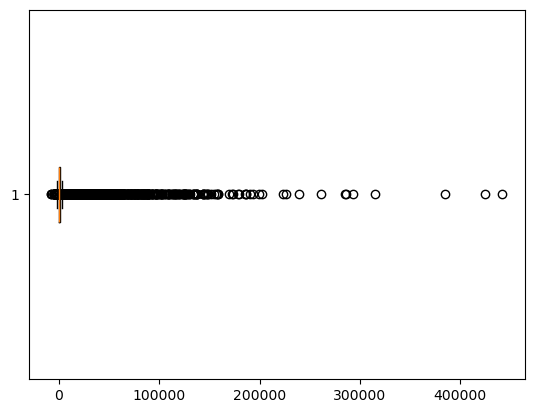

DebtLoadPrincipal


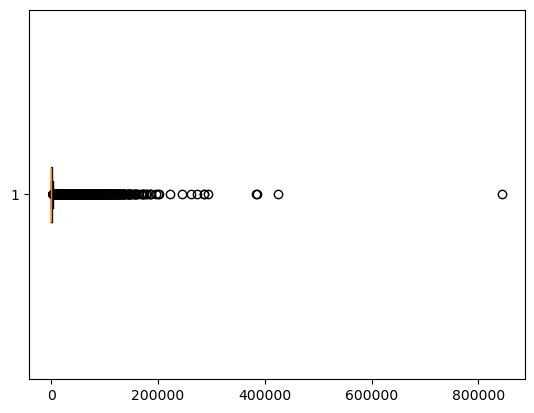

Balanaceatdebt_load


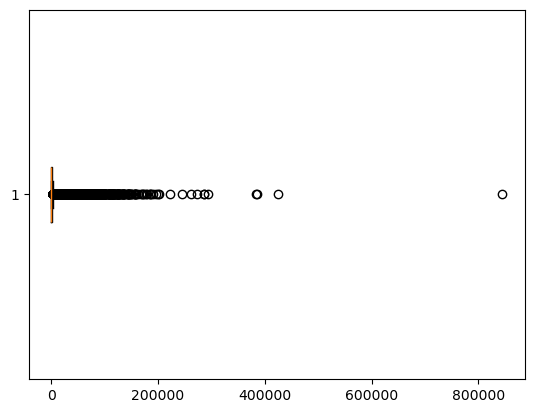

PurchasePrice


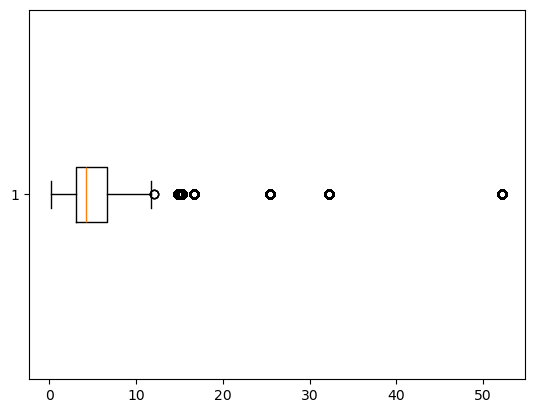

ProductOrDebtType


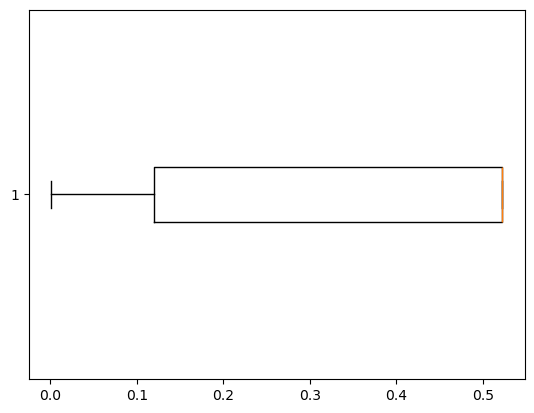

CollectionStatus


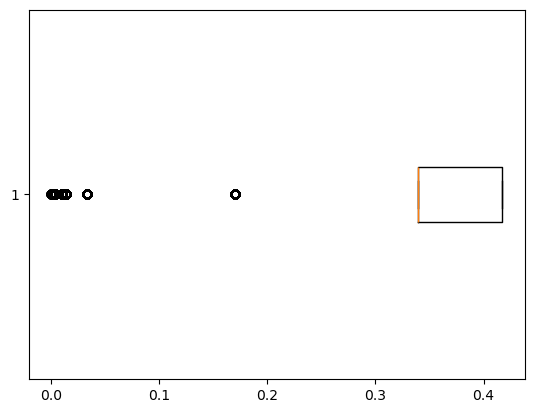

InBankruptcy


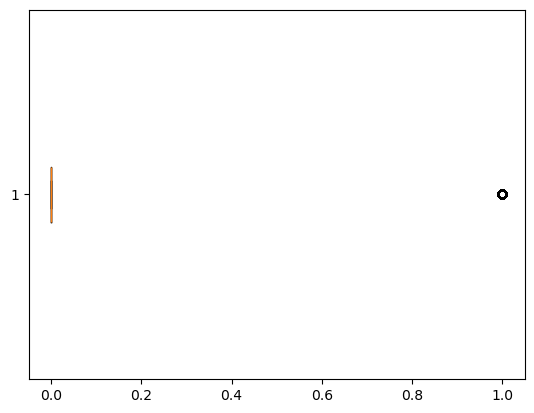

IsLegal


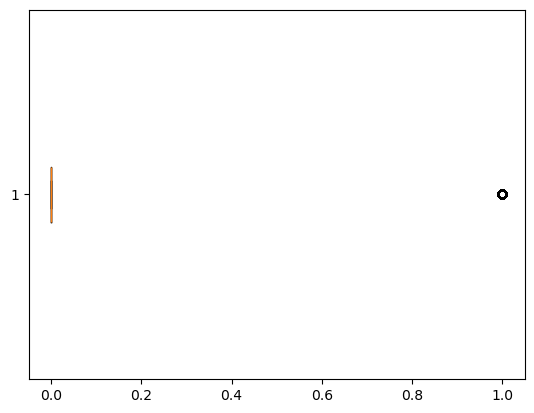

LastPaymentAmount


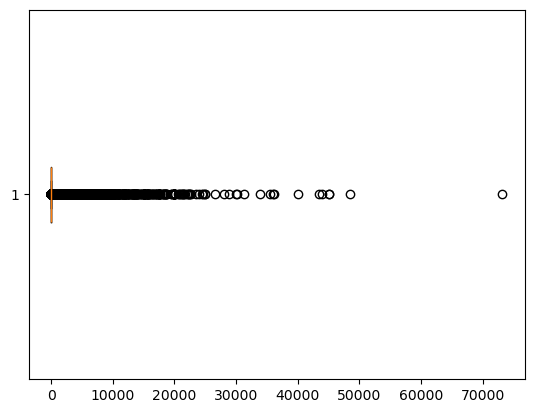

LastPaymentMethod


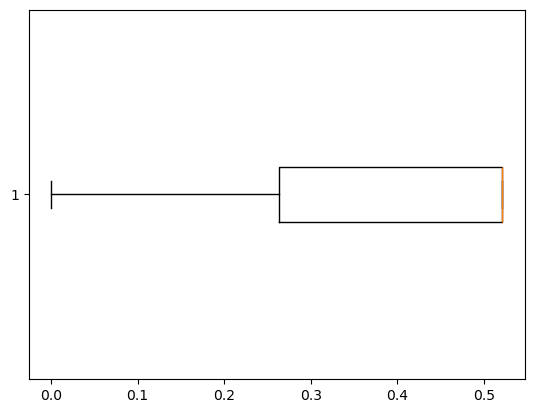

NumLiableParties


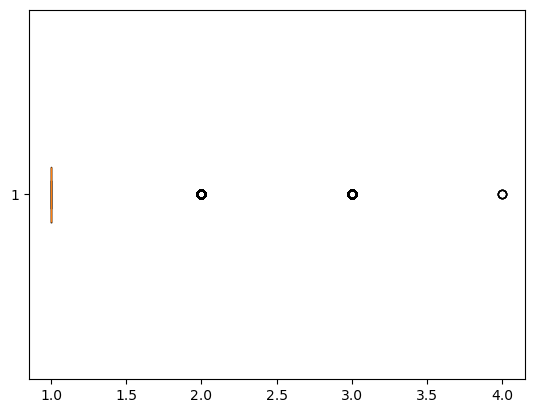

CustomerAge


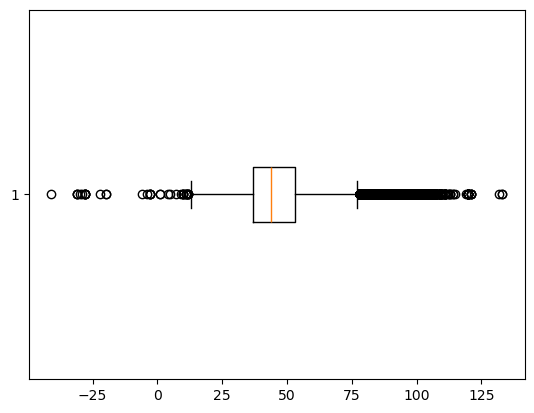

NumPhones


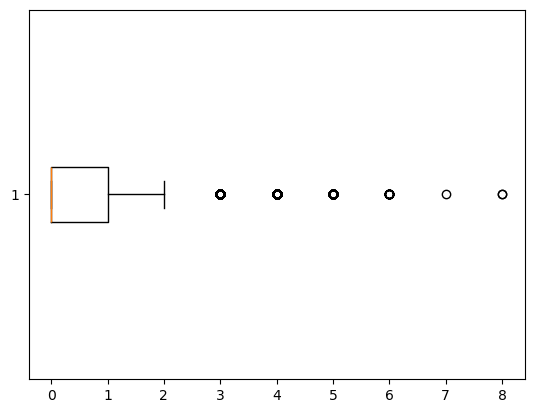

NumEmails


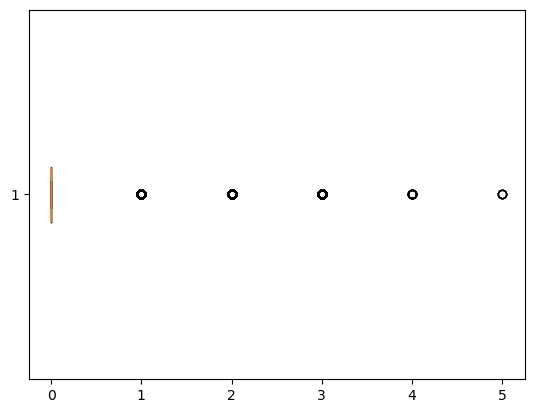

NumAddresses


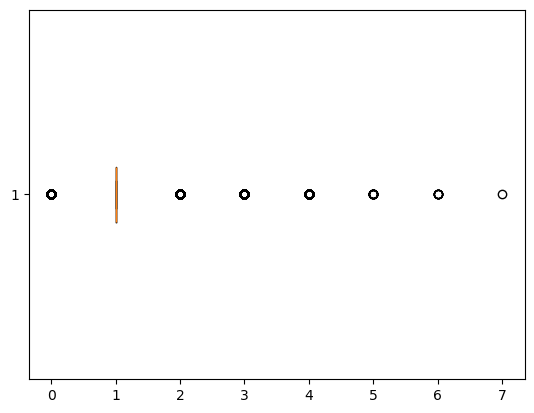

IsStatBarred


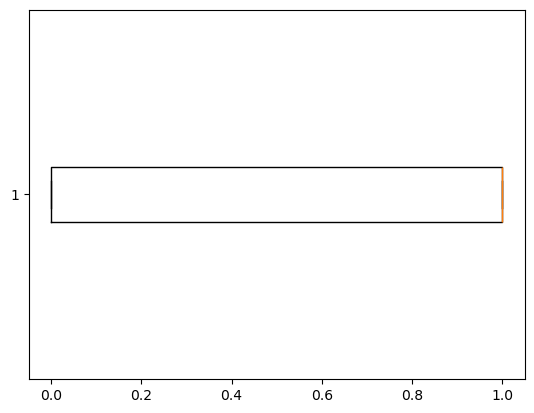

In [212]:

for i in df1.columns:
    print(i)
    plt.boxplot(df1[i], vert = False)
    plt.show()

Outliers exist in following features:
1. Current Balance
2. DebtLoadPrincipal
3. Balanaceatdebt_Load
4. PurchasePrice
5. CollectionStatus
6. LastPaymentAmount
7. NumLiableParties
8. CustomerAge
9. NumPhones
10. NumEmails
11. NumAddresses

Determining the count of outliers in each of the above feature

In [264]:
len(df1.CustomerAge)

406423

In [269]:
#storing all the outlier_features in a np array
outlier_features = np.array(["CurrentBalance", "DebtLoadPrincipal", "Balanaceatdebt_load", "PurchasePrice", "CollectionStatus", "LastPaymentAmount",
                   "NumLiableParties", "CustomerAge", "NumPhones","NumEmails", "NumAddresses"])

def outliers_count(dataframe, features):
    outlier_stats_dict = {}
    for i in range(len(features)):
        #calculate iqr
        q1 = dataframe[features[i]].quantile(0.25)
        q3 = dataframe[features[i]].quantile(0.75)
        iqr = q3 - q1
        #upper and lower bound
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        #identifying outlier
        outliers = ((dataframe[features[i]] < lower_bound) | (dataframe[features[i]] > upper_bound)) #created a boolean mask to identify the outlier
        outlier_count = outliers.sum()
        outlier_percent = 100*(outlier_count/len(dataframe[features[i]]))
        outlier_stats_dict[features[i]] = {
                                            "Outlier_count": outliers.sum(), "Outlier_Percentage": outlier_percent,
                                            "Minimum":dataframe[features[i]].min(),"Minimum_whisker": lower_bound, "Q1": q1, 
                                            "Median": dataframe[features[i]].median(), "Q3": q3, "Maximum_whisker": upper_bound, 
                                            "Maximum": dataframe[features[i]].max()
                                          }
    
    return outlier_stats_dict

outliers_count(df1, outlier_features)

{'CurrentBalance': {'Outlier_count': 42899,
  'Outlier_Percentage': 10.555258929735768,
  'Minimum': -7717.2,
  'Minimum_whisker': -1525.7224999999999,
  'Q1': 85.33,
  'Median': 457.51,
  'Q3': 1159.3649999999998,
  'Maximum_whisker': 2770.4174999999996,
  'Maximum': 441681.52},
 'DebtLoadPrincipal': {'Outlier_count': 44810,
  'Outlier_Percentage': 11.02545869697335,
  'Minimum': 0.0,
  'Minimum_whisker': -1473.245,
  'Q1': 246.97,
  'Median': 619.0,
  'Q3': 1393.78,
  'Maximum_whisker': 3113.995,
  'Maximum': 844343.0},
 'Balanaceatdebt_load': {'Outlier_count': 45902,
  'Outlier_Percentage': 11.294144278251968,
  'Minimum': 0.0,
  'Minimum_whisker': -1525.9450000000002,
  'Q1': 249.875,
  'Median': 630.74,
  'Q3': 1433.755,
  'Maximum_whisker': 3209.5750000000003,
  'Maximum': 844343.0},
 'PurchasePrice': {'Outlier_count': 10688,
  'Outlier_Percentage': 2.6297724292178346,
  'Minimum': 0.19,
  'Minimum_whisker': -2.2100000000000004,
  'Q1': 3.07,
  'Median': 4.22,
  'Q3': 6.59,
  'Ma

Observations:
1. Current Balance minimum value is negative and even minimum_whisker value is negative. So, we will set the outlier conditions for values less than 0 and remove the balance observations as technically speaking, if the current balance is less than 0 then there i no need to predict the debt recovery prediction.
2. Customer Age is forming a bell curve. We can remove the outliers by just considering the whisker values. But logically, the lower whisker is less than 18 and upper whisker is more than 100. So, refining the outlier conditions as: if age < 18 or age > upper_whisker

Conclusion:
To conclude the outlier handling, we plot the CurrentBalance Vs CustomerAge, and come to following conclusion:
1. CustomerAge below 18 and above 90 has high variability and majority of the datapoints falls under 18 to 90 in the Customer Age features.
2. Majority of the data points for CurrentBalance falls below 2500. S

<Figure size 640x480 with 0 Axes>

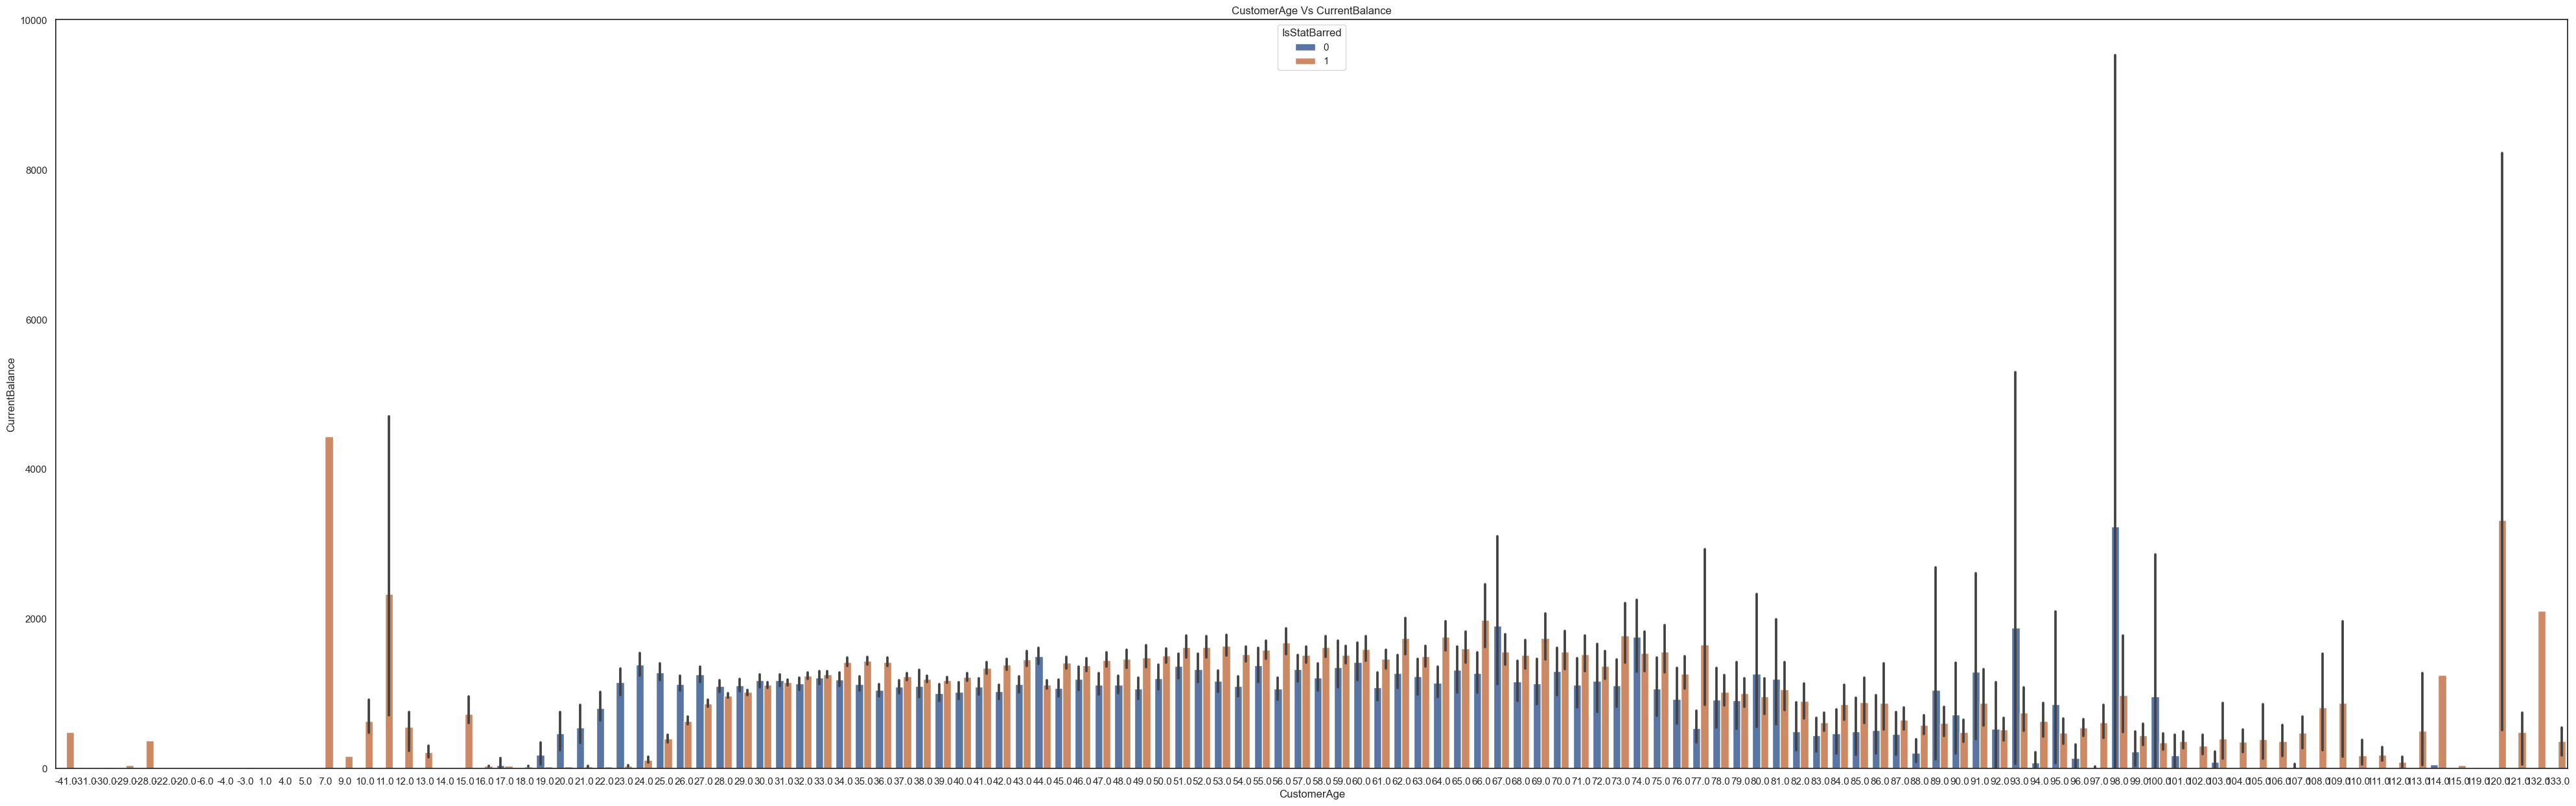

In [281]:
sns.set_style("white")
sns.despine()
plt.figure(figsize=(50, 15))
sns.barplot(x=df1.CustomerAge, y=df1.CurrentBalance, hue=df1.IsStatBarred)
plt.xlabel('CustomerAge')
plt.ylabel('CurrentBalance')
plt.title('CustomerAge Vs CurrentBalance')
plt.show()


<Figure size 640x480 with 0 Axes>

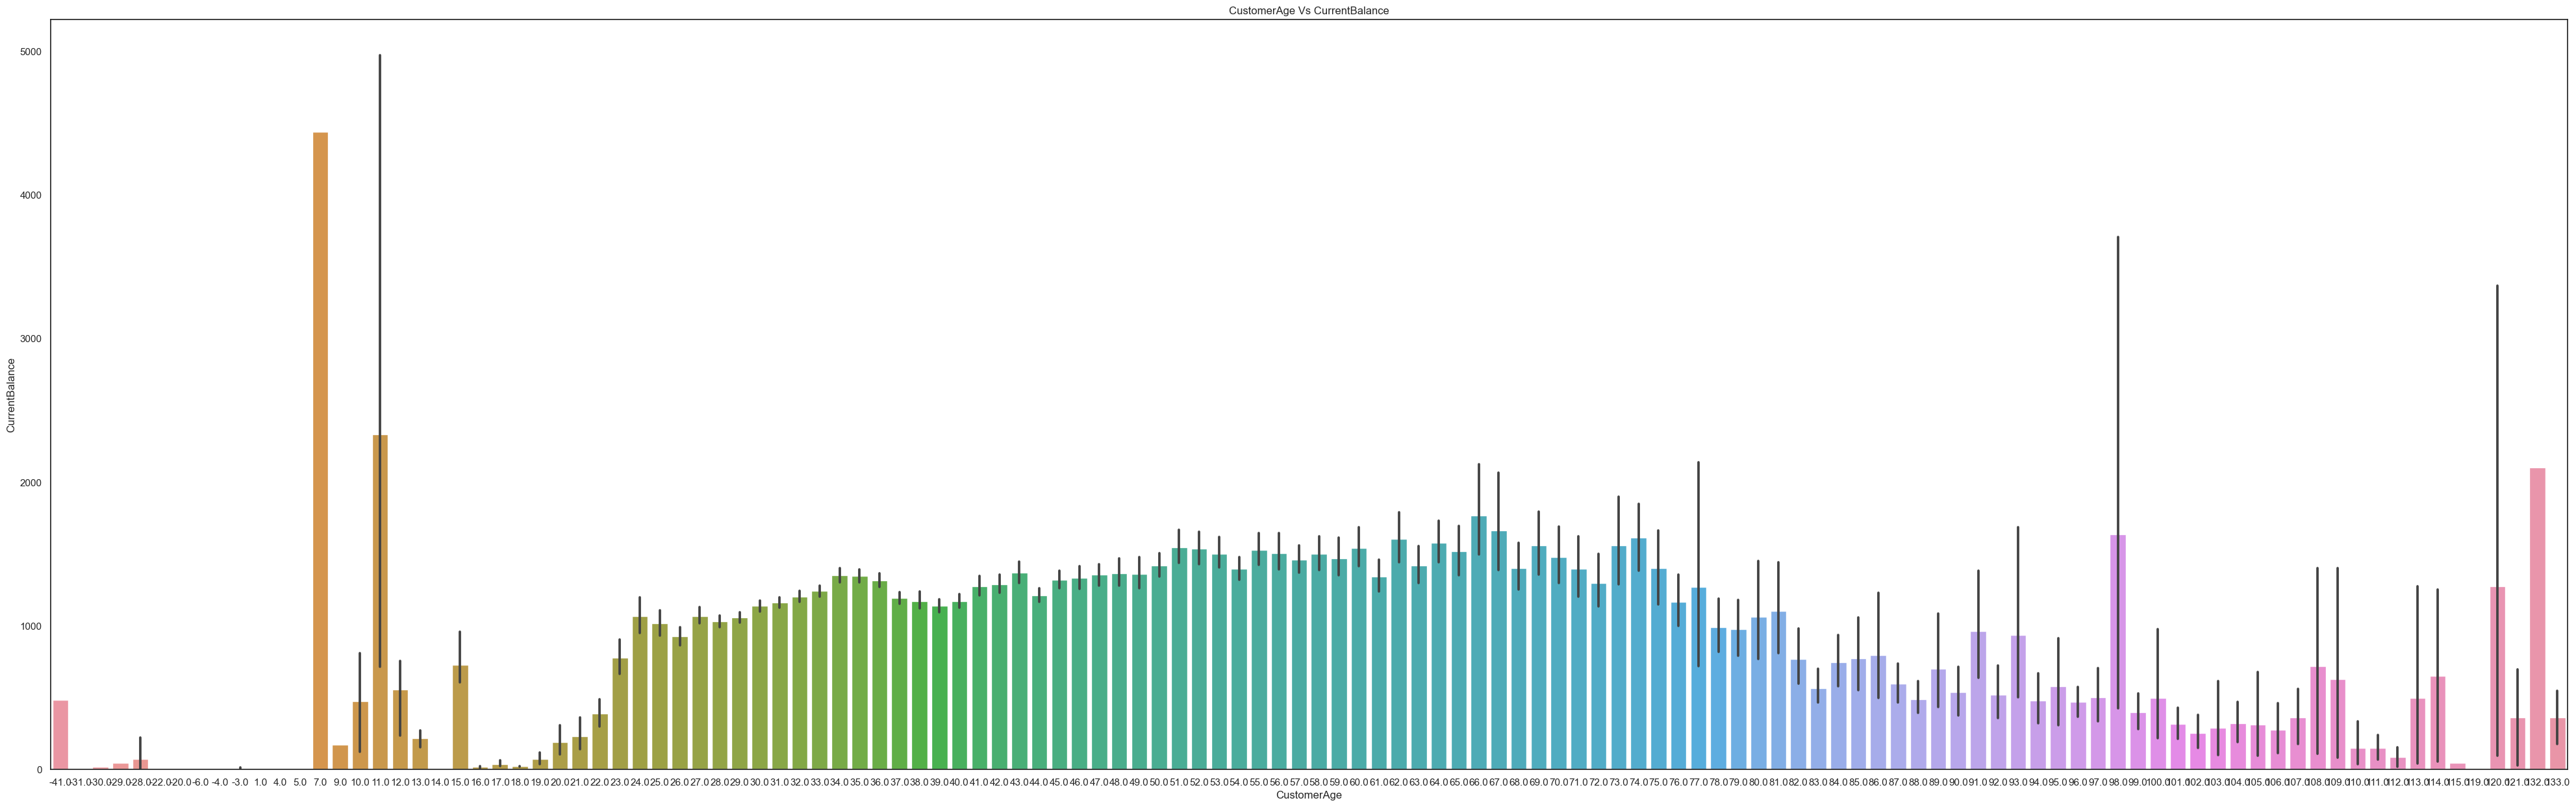

In [296]:
sns.set_style("white")
sns.despine()
plt.figure(figsize=(50, 15))
sns.barplot(x=df1.CustomerAge, y=df1.CurrentBalance)
plt.xlabel('CustomerAge')
plt.ylabel('CurrentBalance')
plt.title('CustomerAge Vs CurrentBalance')
plt.show()

In [288]:
#Removing the outliers on the basis of the above conclusion
#rechecking the outlier_stats for CurrentBalance & Current Age after revising their outlier threshold

In [320]:
df2 = df1[~((df1["CurrentBalance"] < 0) | (df1["CurrentBalance"] > 3000) | (df1["CustomerAge"] < 18) | (df1["CustomerAge"] > 90))]

In [321]:
df2.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.00,1160.20,1160.20,4.22,0.207218,0.170197,0,1,10.00,0.520827,1.0,53.0,0,0,1,0
1,0.000015,4276,182.90,182.90,182.90,4.22,0.207218,0.013506,0,0,20.00,0.262933,1.0,44.0,0,0,1,1
2,0.000020,8525,0.00,538.57,538.57,4.22,0.207218,0.170197,0,0,5.37,0.520827,1.0,44.0,1,0,1,0
4,0.000020,12807,0.00,523.00,523.00,4.22,0.207218,0.170197,0,1,5.00,0.520827,1.0,46.0,2,0,1,1
5,0.000020,13465,1118.74,790.30,790.30,4.22,0.207218,0.339646,0,1,10.00,0.520827,1.0,44.0,0,0,1,1


## Till here, we have handled Categorical Features through different encoding, Handled Missing values and Removed Outliers.
## Our final dataframe df2 is ready for further processing

In [13]:
df2.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,0.000020,3677,0.00,1160.20,1160.20,4.22,0.207218,0.170197,0,1,10.00,0.520827,1.0,53.0,0,0,1,0
1,0.000015,4276,182.90,182.90,182.90,4.22,0.207218,0.013506,0,0,20.00,0.262933,1.0,44.0,0,0,1,1
2,0.000020,8525,0.00,538.57,538.57,4.22,0.207218,0.170197,0,0,5.37,0.520827,1.0,44.0,1,0,1,0
3,0.000020,12807,0.00,523.00,523.00,4.22,0.207218,0.170197,0,1,5.00,0.520827,1.0,46.0,2,0,1,1
4,0.000020,13465,1118.74,790.30,790.30,4.22,0.207218,0.339646,0,1,10.00,0.520827,1.0,44.0,0,0,1,1


In [14]:
#we will drop AccountID as it is unique for all the datapoints
df2.drop("AccountID", axis=1, inplace=True)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362631 entries, 0 to 362630
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  362631 non-null  float64
 1   CurrentBalance              362631 non-null  float64
 2   DebtLoadPrincipal           362631 non-null  float64
 3   Balanaceatdebt_load         362631 non-null  float64
 4   PurchasePrice               362631 non-null  float64
 5   ProductOrDebtType           362631 non-null  float64
 6   CollectionStatus            362631 non-null  float64
 7   InBankruptcy                362631 non-null  int64  
 8   IsLegal                     362631 non-null  int64  
 9   LastPaymentAmount           362631 non-null  float64
 10  LastPaymentMethod           362631 non-null  float64
 11  NumLiableParties            362631 non-null  float64
 12  CustomerAge                 362631 non-null  float64
 13  NumPhones     

In [16]:
#splitting target variable from the independent variable
X_independent = df2.drop("IsStatBarred", axis=1)
y_dependent = df2["IsStatBarred"]

In [17]:
X_independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362631 entries, 0 to 362630
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  362631 non-null  float64
 1   CurrentBalance              362631 non-null  float64
 2   DebtLoadPrincipal           362631 non-null  float64
 3   Balanaceatdebt_load         362631 non-null  float64
 4   PurchasePrice               362631 non-null  float64
 5   ProductOrDebtType           362631 non-null  float64
 6   CollectionStatus            362631 non-null  float64
 7   InBankruptcy                362631 non-null  int64  
 8   IsLegal                     362631 non-null  int64  
 9   LastPaymentAmount           362631 non-null  float64
 10  LastPaymentMethod           362631 non-null  float64
 11  NumLiableParties            362631 non-null  float64
 12  CustomerAge                 362631 non-null  float64
 13  NumPhones     

In [18]:
y_dependent.info()

<class 'pandas.core.series.Series'>
RangeIndex: 362631 entries, 0 to 362630
Series name: IsStatBarred
Non-Null Count   Dtype
--------------   -----
362631 non-null  int64
dtypes: int64(1)
memory usage: 2.8 MB


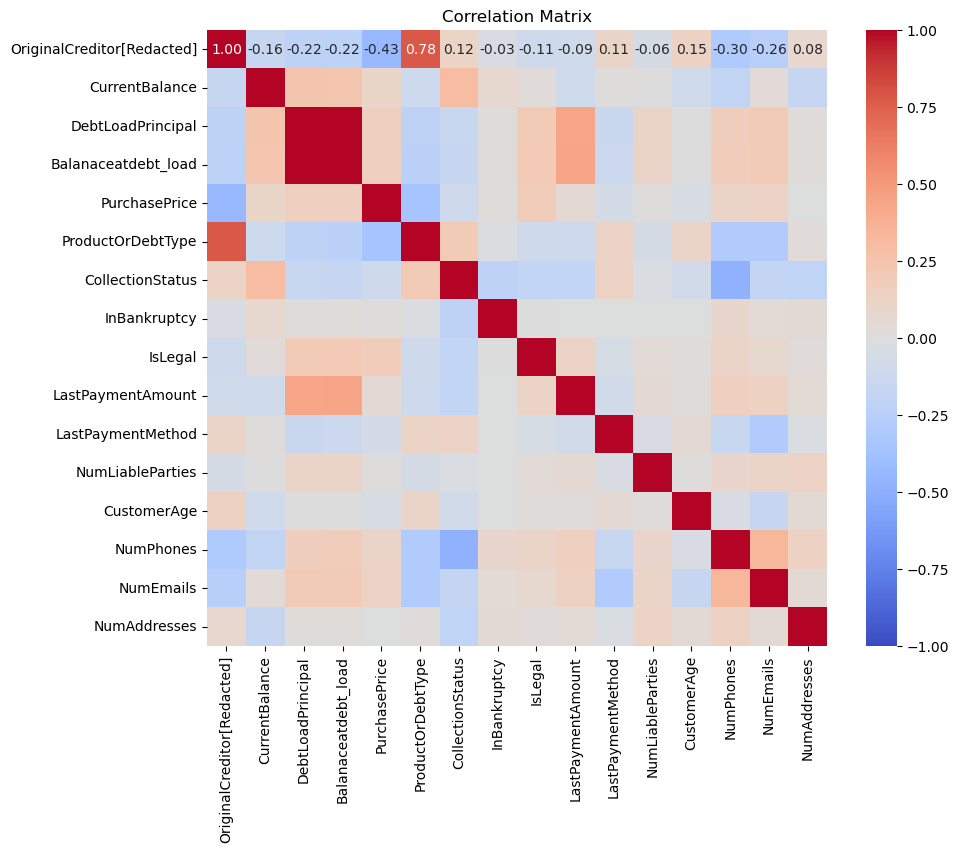

In [19]:
#checking coorelation between independent variables
corr_matrix = X_independent.corr()

#Plotting corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [21]:
# in the above correlation matrix, it is clearly evident that Balanaceatdebt_load and DebtLoadPrincipal are completely correlated.
# hence, we can drop any one of them. In this case, we will drop Balancaceatdebt_Load
X_independent = X_independent.drop(["Balanaceatdebt_load"], axis=1)

In [22]:
X_independent.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,0.000020,0.00,1160.20,4.22,0.207218,0.170197,0,1,10.00,0.520827,1.0,53.0,0,0,1
1,0.000015,182.90,182.90,4.22,0.207218,0.013506,0,0,20.00,0.262933,1.0,44.0,0,0,1
2,0.000020,0.00,538.57,4.22,0.207218,0.170197,0,0,5.37,0.520827,1.0,44.0,1,0,1
3,0.000020,0.00,523.00,4.22,0.207218,0.170197,0,1,5.00,0.520827,1.0,46.0,2,0,1
4,0.000020,1118.74,790.30,4.22,0.207218,0.339646,0,1,10.00,0.520827,1.0,44.0,0,0,1


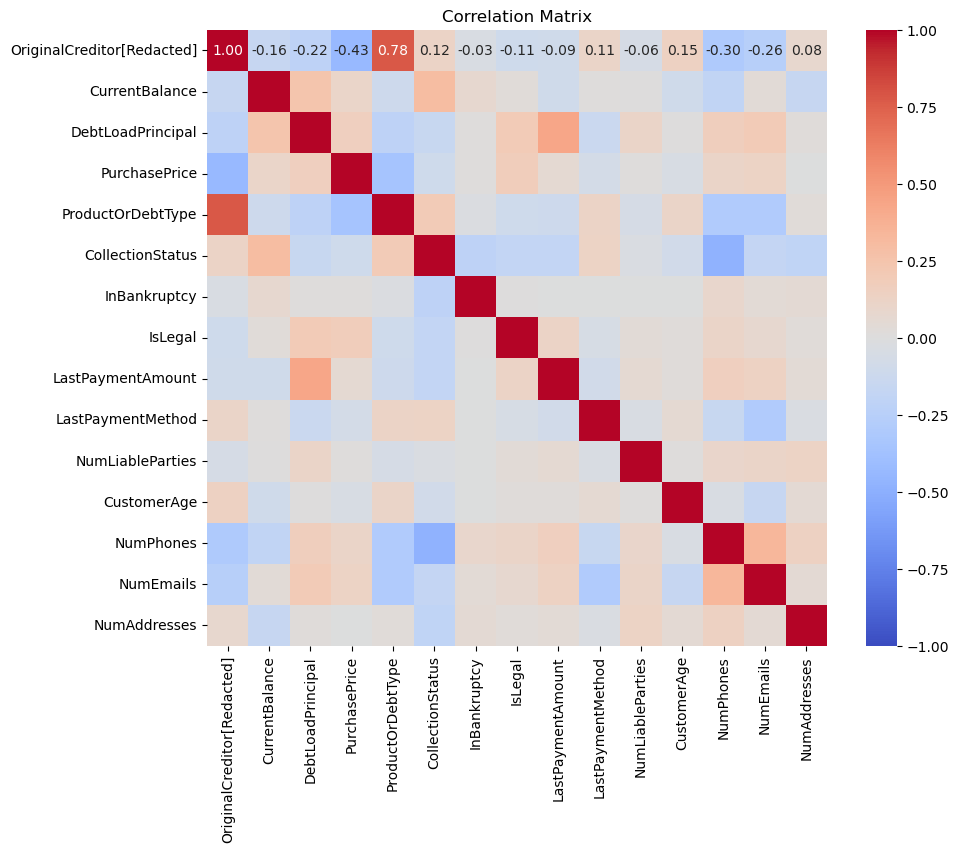

In [23]:
#checking coorelation agains after dropping Balanaceatdebt_load
corr_matrix = X_independent.corr()

#Plotting corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [24]:
#ProductorDebtType and OriginalCreditor[Redacted] are also highly correlated with a coeffcient of 0.78
#Both of these features were frequency encoded as they were categorical features.
#however, ProductOrDebtType seems more important than the OriginalCreditor[Redacted]
#so we will drop OriginalCreditor[Redacted] from our train data
X_independent = X_independent.drop(["OriginalCreditor[Redacted]"], axis=1)

In [31]:
X_independent.head()

,CurrentBalance,DebtLoadPrincipal,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,0.00,1160.20,4.22,0.207218,0.170197,0,1,10.00,0.520827,1.0,53.0,0,0,1
1,182.90,182.90,4.22,0.207218,0.013506,0,0,20.00,0.262933,1.0,44.0,0,0,1
2,0.00,538.57,4.22,0.207218,0.170197,0,0,5.37,0.520827,1.0,44.0,1,0,1
3,0.00,523.00,4.22,0.207218,0.170197,0,1,5.00,0.520827,1.0,46.0,2,0,1
4,1118.74,790.30,4.22,0.207218,0.339646,0,1,10.00,0.520827,1.0,44.0,0,0,1


In [32]:
y_dependent.head()

0    0
1    1
2    0
3    1
4    1
Name: IsStatBarred, dtype: int64

In [27]:
#saving both of these in a csv format
X_independent.to_csv("X_independent.csv", index=False)
y_dependent.to_csv("y_target.csv", index=False)

In [29]:
X_independent.head()

,CurrentBalance,DebtLoadPrincipal,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,0.00,1160.20,4.22,0.207218,0.170197,0,1,10.00,0.520827,1.0,53.0,0,0,1
1,182.90,182.90,4.22,0.207218,0.013506,0,0,20.00,0.262933,1.0,44.0,0,0,1
2,0.00,538.57,4.22,0.207218,0.170197,0,0,5.37,0.520827,1.0,44.0,1,0,1
3,0.00,523.00,4.22,0.207218,0.170197,0,1,5.00,0.520827,1.0,46.0,2,0,1
4,1118.74,790.30,4.22,0.207218,0.339646,0,1,10.00,0.520827,1.0,44.0,0,0,1


In [30]:
y_dependent.head()

0    0
1    1
2    0
3    1
4    1
Name: IsStatBarred, dtype: int64

## Model Training Begins

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv("X_independent_revised.csv")
y = pd.read_csv("y_target.csv")

In [3]:
X.head()

,CurrentBalance,PurchasePrice,CustomerAge
0,0.00,4.22,53
1,182.90,4.22,44
2,0.00,4.22,44
3,0.00,4.22,46
4,1118.74,4.22,44


In [4]:
y_1d = y.values.ravel()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
#Scaling the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_1d, test_size=0.2, random_state=42)

In [10]:
model_rf = RandomForestClassifier()
model_lg = LogisticRegression()

In [11]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
model_lg.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_predict_rf = model_rf.predict(X_test)
y_predict_lg = model_lg.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
#Metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_predict_rf)
precision_rf = precision_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
f1_rf = f1_score(y_test, y_predict_rf)

In [16]:
#Metrics for Logistic Regression
accuracy_lg = accuracy_score(y_test, y_predict_lg)
precision_lg = precision_score(y_test, y_predict_lg)
recall_lg = recall_score(y_test, y_predict_lg)
f1_lg = f1_score(y_test, y_predict_lg)

In [17]:
print("Accuracy of Random Forest: ", accuracy_rf)
print("Precision of Random Forest: ", precision_rf)
print("Recall of Random Forest: ", recall_rf)
print("F1 score of Random Forest", f1_rf)

Accuracy of Random Forest:  0.9223599487087567
Precision of Random Forest:  0.9394073418841221
Recall of Random Forest:  0.9516870568066703
F1 score of Random Forest 0.945507330526927


In [18]:
print("Accuracy of Logistic Regression: ", accuracy_lg)
print("Precision of Logistic Regression: ", precision_lg)
print("Recall of Logistic Regression: ", recall_lg)
print("F1 score of Logistic Regression", f1_lg)

Accuracy of Logistic Regression:  0.7288320211783198
Precision of Logistic Regression:  0.7260913647593071
Recall of Logistic Regression:  0.9905322216161458
F1 score of Logistic Regression 0.8379436218162641


In [24]:
#we take random forest as our final selected model as it all the metrics better than the logistic regression

In [25]:
y_prob_rf = model_rf.predict_proba(X_test)

In [26]:
y_prob_rf

array([[0.98476755, 0.01523245],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [27]:
y_prob_rf_class_1 = y_prob_rf[:, 1]
y_prob_rf_class_0 = y_prob_rf[:, 0]

In [29]:
#this gives the probability of every sample data point present in the X_test about being StatBarred or not
y_prob_rf_class_1

array([0.01523245, 1.        , 0.        , ..., 1.        , 1.        ,
       1.        ])